Importing all the libraries 

In [87]:
import warnings
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import math as m
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


Q1. Read the column description and ensure you understand each attribute well

In [88]:
df=pd.read_csv('C:\\Users\\07sim\\Downloads\\Bank_Personal_Loan.csv')

In [89]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [90]:
df.shape

(5000, 14)

In [91]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

Here we can see that some variable are int which should have been object type. So, we will convert variable from int t object using astype(). 

In [92]:
df.Education = df.Education.astype('object')
df['Personal Loan']  = df['Personal Loan'] .astype('object')
df['Securities Account'] = df['Securities Account'].astype('object')
df.Online = df.Online.astype('object')
df.CreditCard = df.CreditCard.astype('object')
df['CD Account'] = df['CD Account'].astype('object')

Now we will recheck the datatypes

In [93]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education              object
Mortgage                int64
Personal Loan          object
Securities Account     object
CD Account             object
Online                 object
CreditCard             object
dtype: object

Now we can see the corrected datatypes 

Next we will see the summary of numerical and categorical data independently and make observations for the same

In [94]:
df.describe(include = object)

,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000,5000,5000,5000,5000,5000
unique,3,2,2,2,2,2
top,1,0,0,0,1,0
freq,2096,4520,4478,4698,2984,3530


Deductions:
* From the abover table we can see that a lot of customers are students.
* A lot of customers did not accept the loan that was offered by bank
* Some customers did not use the credit card issues by the bank
* A lot of customers use online banking

In [95]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


Deductions
* Average age of our consumers is 45 years.
* Maximum and minimum years of experience is 45 and -3 years respectively


In [96]:
missing_values = df.isnull().sum()
print(missing_values)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


here we can see there are no missing values

Q2. Perform univariate analysis of each and every attribute - use an appropriate plot for a given attribute and mention your insights (5 points)


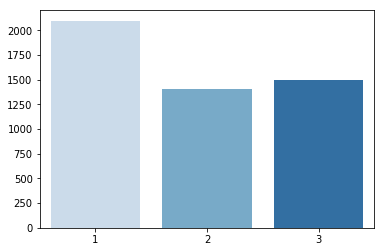

In [97]:
df2=df['Education'].value_counts()
sns.barplot(df2.index, df2.values, palette="Blues")

Here we can clearly see the maximum of no of custoners are students

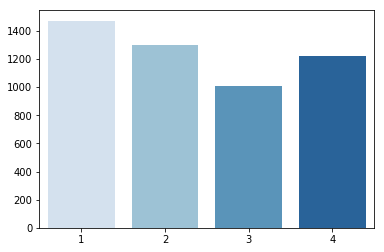

In [98]:
df2 = df['Family'].value_counts()
sns.barplot(df2.index, df2.values, palette="Blues")

From above plot we can see family size of customers is from 1 to 4 members

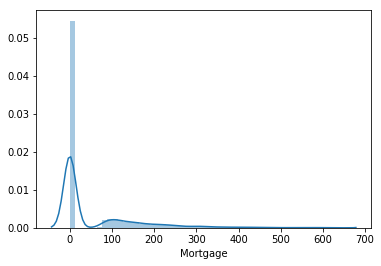

In [99]:
df3=pd.Series(df['Mortgage'] )
sns.distplot(df3)

From the graph we can observe that more that 50% of the customers haven't given info regarding mortgage

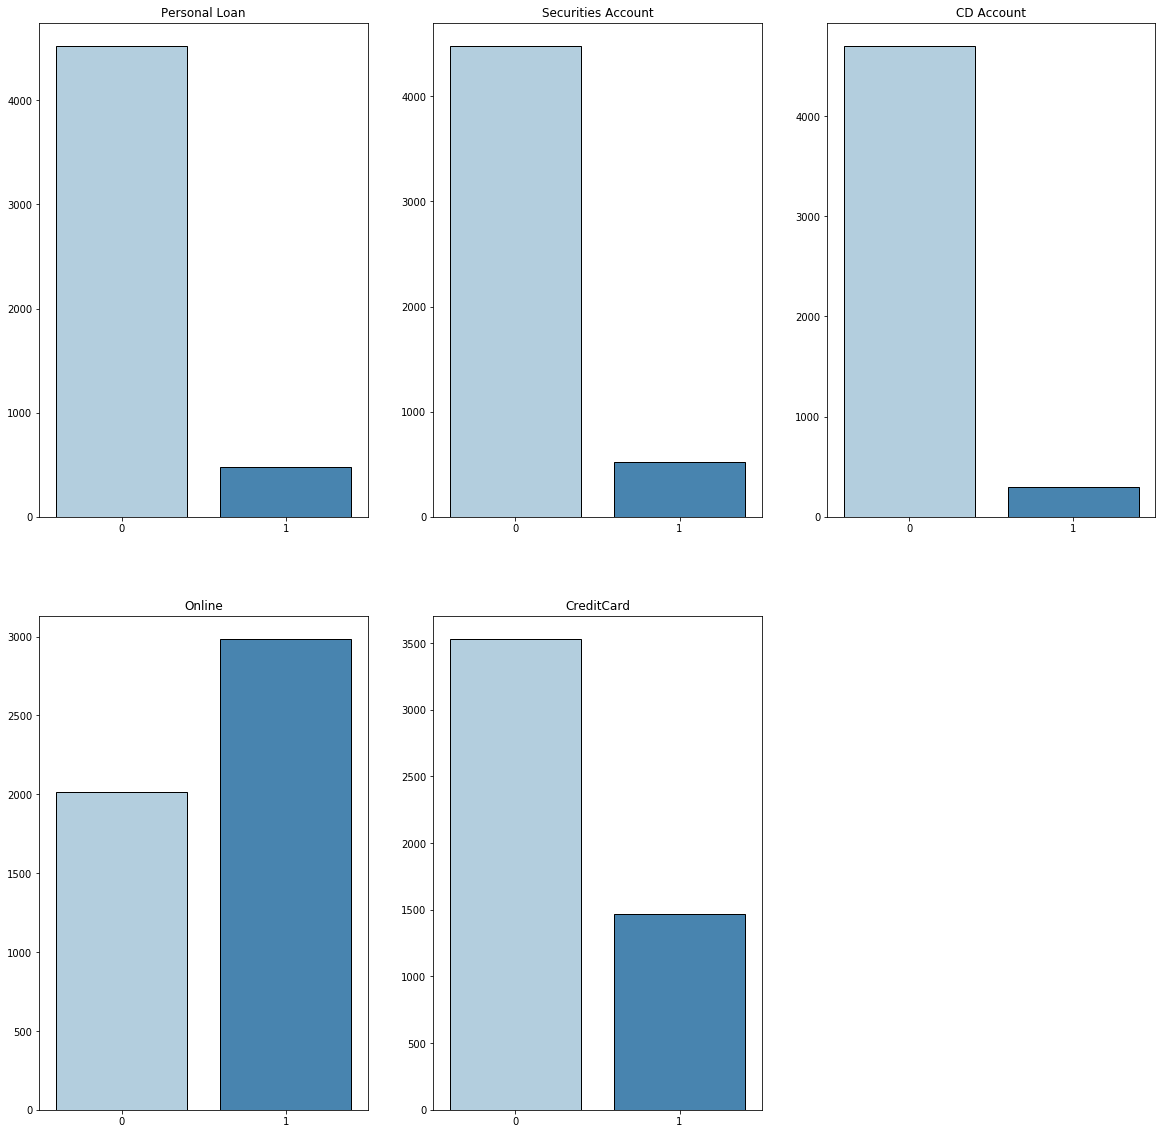

In [100]:
x=1
plt.figure(figsize=(20,20))
for column in ['Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    plt.subplot(2,3,x)
    df_=df[column].value_counts()
    sns.barplot(df_.index, df_.values, edgecolor="black", palette="Blues")
    plt.title(column)
    x+=1
plt.show()

From the above graph we can make following remarks-
* Less than 1000 customers have accepted the personal loan 
* Less than 1000 customers have securities account with the bank
* Very few customers have CD with the bank
* Around 3000 customers use internet banking facilities 
* Around 1500 customers have credit card with the bank

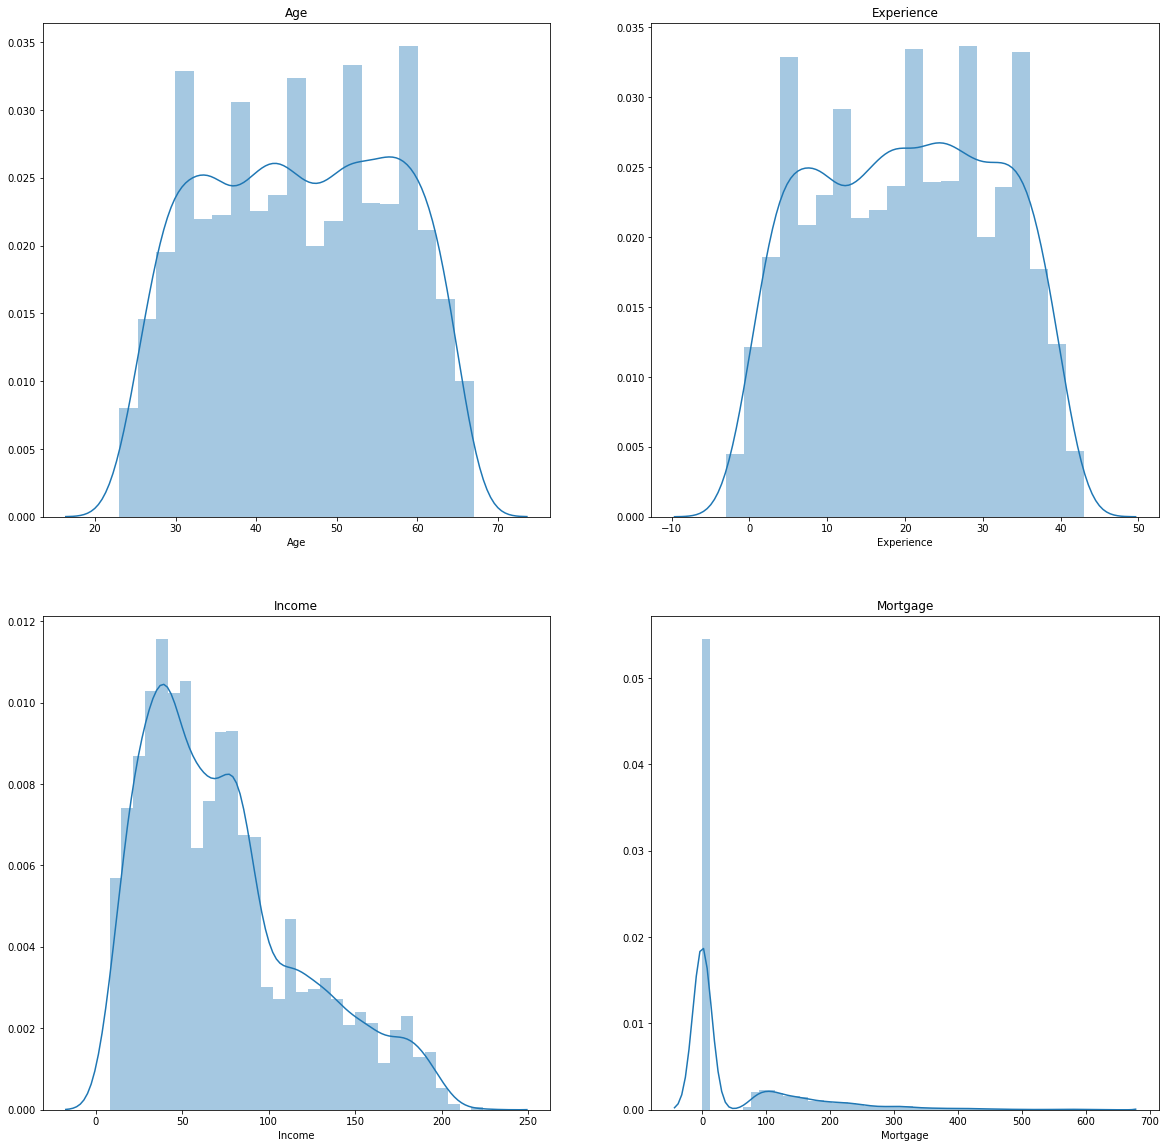

In [101]:
x=1
plt.figure(figsize=(20,20))
for column in ['Age','Experience','Income','Mortgage']:
    plt.subplot(2,2,x)
    df_=pd.Series(df[column] )
    sns.distplot(df_)
    plt.title(column)
    x+=1
plt.show()

Remarks:
* Age of most of the customers lies between 30 and 60
* Income of most customers ranges from 10,000 to 90,000 dollars

Q3. Perform correlation analysis among all the variables - you can use Pairplot and Correlation coefficients of every attribute with every other attribute (5 points)

In [102]:
df_nf = df.select_dtypes(include=[np.number])
df_nf.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage'],
      dtype='object')

The given dataframe has 8 numeric features

In [103]:
df_nf.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,-0.013920
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,-0.012539
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,-0.010582
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,0.206806
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,0.007383
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,-0.020445
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,0.109905
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,1.000000


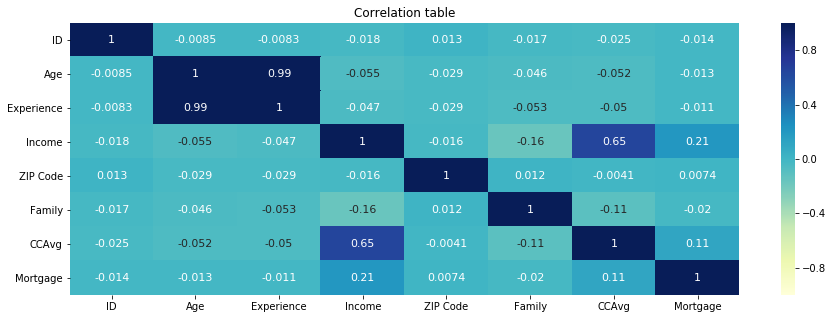

In [104]:
corr = df_nf.corr() 
plt.figure(figsize=(15, 5))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 11})
plt.title('Correlation table')
plt.show()

We can see that age and experience are highly correlated we can drop them while model building

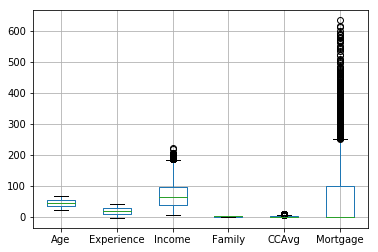

In [105]:
# for outliers
df_nf.boxplot(column=[ 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage'])
plt.show()

In [106]:
Q1 = df_nf.quantile(0.25)
Q3 = df_nf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID            2499.5
Age             20.0
Experience      20.0
Income          59.0
ZIP Code      2697.0
Family           2.0
CCAvg            1.8
Mortgage       101.0
dtype: float64


In [107]:
#replcing outliers with IORs
df_final = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Q4. One hot encode the Education variable

In [108]:
df_nf = df_final.select_dtypes(include=[np.number])
df_nf.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage'],
      dtype='object')

In [109]:
#for categorical features
df_cf = df_final.select_dtypes(include=[np.object])
df_cf.columns

Index(['Education', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [110]:
for column in df_final[['Education']]:
    df_encoded_variables = pd.get_dummies(df_cf[column], prefix=column, drop_first=False)
    df_cf = pd.concat([df_cf, df_encoded_variables],axis=1)
    df_cf.drop([column], axis=1, inplace=True)

In [111]:
df_dummy = pd.concat([df_nf, df_cf], axis=1)

In [112]:
df_dummy.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


Q5. Separate the data into dependant and independent variables and create training and test sets out of them (X_train, y_train, X_test, y_test) (2 points)

In [113]:
df_train, df_test = train_test_split(df_dummy, random_state=1)
print(df_test.shape)
print(df_train.shape)

(1100, 16)
(3297, 16)


In [114]:
X_train = df_train.drop(['Personal Loan','Age'], axis=1)  
X_test = df_test.drop(['Personal Loan','Age'], axis=1) 
y_train = df_train ['Personal Loan']
y_test = df_test ['Personal Loan']


In [115]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

Q6. Use StandardScaler( ) from sklearn, to transform the training and test data into scaled values ( fit the StandardScaler object to the train data and transform train and test data using this object, making sure that the test set does not influence the values of the train set) (5 points)

In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_fit = sc.fit(X_train)
X_train= X_train_fit.transform(X_train)
X_test_fit = sc.fit(X_test)
X_test = X_train_fit.transform(X_test)

C:\Users\07sim\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\07sim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\07sim\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\07sim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  


In [117]:
print(X_test.shape)
print(X_train.shape)

(1100, 14)
(3297, 14)


Q7. Write a function which takes a model, X_train, X_test, y_train and y_test as input and returns the accuracy, recall, precision, specificity, f1_score of the model trained on the train set and evaluated on the test set (5 points)

In [118]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score,confusion_matrix
def Evaluation(model, X_train, X_test, y_train, y_test):
    predicted = model.predict(X_test)
    print('Accuracy score: {}'.format(accuracy_score(y_test, predicted.round(), normalize=False)))
    print('Precision score: {}'.format(precision_score(y_test, predicted)))
    print('F1 score: {}'.format(f1_score(y_test, predicted)))
    print('Recall score: {}'.format(recall_score(y_test, predicted)))
    tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
    specificity = tn / (tn+fp)
    print('Specificity:',specificity)

Q8. Employ multiple Classification models (Logistic, K-NN, Naïve Bayes etc) and use the function from step 7 to train and get the metrics of the model (15 points)

Building Logistics Model

In [119]:
from sklearn.linear_model import LogisticRegression
Lmodel = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [120]:
y_predict=Lmodel.predict(X_test)

In [121]:
Lmodel.score(X_test, y_test)

0.9690909090909091

In [122]:
c_m = metrics.confusion_matrix(y_test, y_predict)
print (c_m)

[[1025    8]
 [  26   41]]


In [123]:
Evaluation(Lmodel,X_train, X_test, y_train, y_test)

Accuracy score: 1066
Precision score: 0.8367346938775511
F1 score: 0.706896551724138
Recall score: 0.6119402985074627
Specificity: 0.9922555663117134


Building a naïve Bayes model

In [124]:
from sklearn.naive_bayes import GaussianNB
g_nb = GaussianNB()
y_predict_ = g_nb.fit(X_train, y_train).predict(X_test)

In [125]:
g_nb.score(X_test, y_test)

0.9281818181818182

In [126]:
c_m = metrics.confusion_matrix(y_test, y_predict_)
print (c_m)

[[982  51]
 [ 28  39]]


In [127]:
Evaluation(g_nb,X_train, X_test, y_train, y_test)

Accuracy score: 1021
Precision score: 0.43333333333333335
F1 score: 0.4968152866242039
Recall score: 0.582089552238806
Specificity: 0.9506292352371732


Building a K-Nearest Neighbour model


In [128]:
from sklearn.neighbors import KNeighborsClassifier
k_n = KNeighborsClassifier(n_neighbors=3)
y_predict2=k_n.fit(X_train, y_train).predict(X_test)

In [129]:
k_n.score(X_test, y_test)

0.9636363636363636

In [130]:
c_m = metrics.confusion_matrix(y_test, y_pred2)
print (c_m)

[[1030    3]
 [  37   30]]


In [131]:
Evaluation(k_n,X_train, X_test, y_train, y_test)

Accuracy score: 1060
Precision score: 0.9090909090909091
F1 score: 0.6
Recall score: 0.44776119402985076
Specificity: 0.9970958373668926


Q9. Create a dataframe with the columns - “Model”, “accuracy”, “recall”, “precision”, “specificity”, “f1_score”. Populate the dataframe accordingly (5 points)

In [132]:
column = ['Model', 'Accuracy Score', 'Precision score','Recall score','F1 score','Specificity']
df_col =pd.DataFrame(columns=column)

In [133]:
series_ = [pd.Series(['Logistic',1066,0.836,0.611,0.706,0.992],index=df_col.columns),
                pd.Series(['Naive Bayes',1021,0.433,0.582,0.496,0.950],index=df_col.columns),
                pd.Series(['KNN',1060,0.90,0.44,0.6,0.997],index=df_col.columns)]

In [134]:
df_col.append(series_, ignore_index=True)

,Model,Accuracy Score,Precision score,Recall score,F1 score,Specificity
0,Logistic,1066,0.836,0.611,0.706,0.992
1,Naive Bayes,1021,0.433,0.582,0.496,0.950
2,KNN,1060,0.900,0.440,0.600,0.997


Q10. Give your reasoning on which is the best model in this case

According to me Logistic is the best model because:
* It has the highest accuracy score 
* We can also reject Naive Base because it has high false positives 
* KNN and Logistic both has high false negatives 
* From the F1 score we can see it is more accurate than KNN Model
* So overall we can say that Logistic model is better of all